In [2]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense
import plotly.express as px
import plotly.graph_objects as go
from tensorflow.keras import layers,models,datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import random
import warnings
warnings.filterwarnings("ignore")
from keras.callbacks import EarlyStopping


Using TensorFlow backend.


In [3]:
#Divide into train and test data.

(X_train,y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()

Text(0.5, 1.0, 'Count of different labels in the training data')

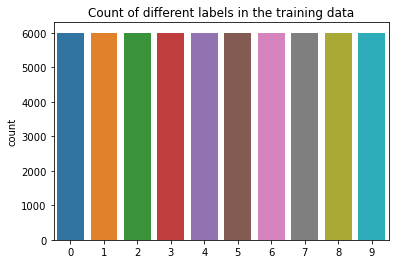

In [4]:
# Count of different labels in the training data

train_count = sns.countplot(y_train)
train_count
plt.title("Count of different labels in the training data")

Text(0.5, 1.0, 'Count of different labels in the testing data')

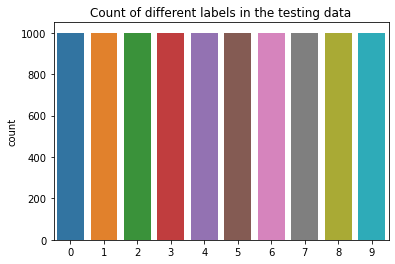

In [5]:
# Count of different labels in the testing data

test_count = sns.countplot(y_test)
test_count
plt.title("Count of different labels in the testing data")

In [6]:
# Giving the image names for target data
image_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


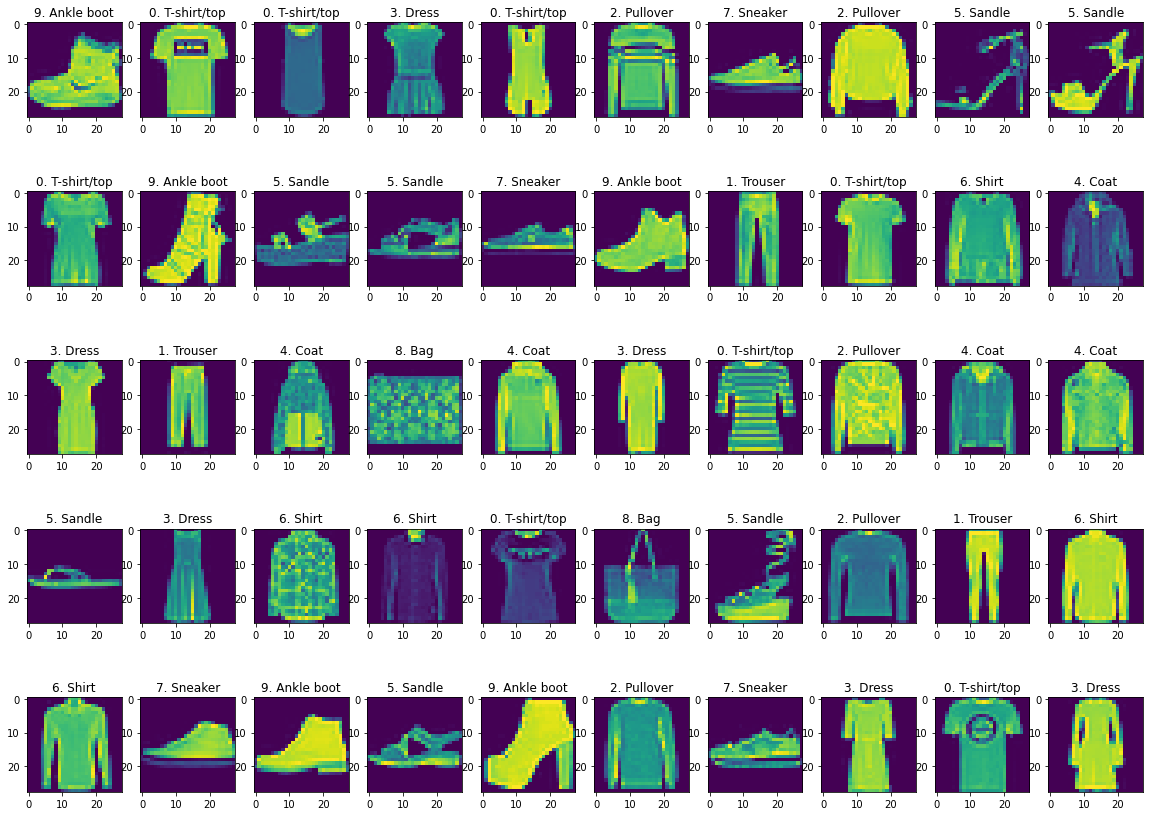

In [7]:
# Images of the training data

fig = plt.figure(figsize=[20, 15])
for i in range(50):
    ax = fig.add_subplot(5, 10, i+1)
    ax.imshow(X_train[i])
    ax.set_title('{}. {}'.format(str(y_train[i]), image_names[(y_train[i])]))


In [8]:
# Check the shape of training features
X_train.shape

(60000, 28, 28)

In [9]:
# Check the shape of training targets
y_train.shape

(60000,)

In [10]:
# Check the shape of testing features
X_test.shape

(10000, 28, 28)

In [11]:
# Check the shape of testing targets
y_test.shape

(10000,)

In [12]:
# reshape the data into 4D
X_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0],  X_test.shape[1], X_test.shape[2], 1))

In [13]:
# check the shape of train
X_train.shape

(60000, 28, 28, 1)

In [14]:
# check the shape of test
X_test.shape

(10000, 28, 28, 1)

In [15]:
# rescale the data
X_train = X_train/255
X_test = X_test/255

#X_train[1]

In [16]:
# Converting into categorical

y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)


In [17]:
# Creating a convolutional neural network

base_model = keras.models.Sequential([
          keras.layers.Conv2D(filters=32, kernel_size=5, 
                              strides=1, activation='relu', 
                              input_shape=(28,28,1), padding='same',kernel_initializer=tf.keras.initializers.LecunNormal(),), # layer-1

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'),

          keras.layers.Conv2D(filters=64, kernel_size=5, 
                              strides=1, activation='relu',padding='valid',kernel_initializer=tf.keras.initializers.LecunNormal(),), #layer-2


          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'),
    

          keras.layers.Conv2D(filters=120, kernel_size=5, 
                              strides=1, activation='relu',padding='valid',kernel_initializer=tf.keras.initializers.LecunNormal(),), #layer-3
    
                              
          keras.layers.Flatten(),

          keras.layers.Dropout(0.2),

          keras.layers.Dense(units=512, activation='relu'), #layer - 4
          keras.layers.Dense(units=10, activation='softmax')]) #layer-5

In [18]:
# checking the summary of the convolutional neural network model
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         192120    
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dropout (Dropout)            (None, 120)               0

In [24]:
 # Compile and fit the model on the training data and check for accuracy


learning_rate_decay = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)


base_model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adamax(learning_rate = learning_rate_decay),metrics = ["accuracy"])
records = base_model.fit(X_train,y_train,epochs = 10,batch_size = 512,validation_data =(X_test,y_test),callbacks = [callback])

Epoch 1/10
118/118 [==============================] - 57s 485ms/step - loss: 0.2583 - accuracy: 0.9054 - val_loss: 0.2791 - val_accuracy: 0.8983
Epoch 2/10
118/118 [==============================] - 53s 448ms/step - loss: 0.2410 - accuracy: 0.9116 - val_loss: 0.2716 - val_accuracy: 0.9015
Epoch 3/10
118/118 [==============================] - 53s 453ms/step - loss: 0.2355 - accuracy: 0.9125 - val_loss: 0.2730 - val_accuracy: 0.9035
Epoch 4/10
118/118 [==============================] - 59s 500ms/step - loss: 0.2297 - accuracy: 0.9153 - val_loss: 0.2696 - val_accuracy: 0.9036
Epoch 5/10
118/118 [==============================] - 51s 428ms/step - loss: 0.2248 - accuracy: 0.9168 - val_loss: 0.2623 - val_accuracy: 0.9088
Epoch 6/10
118/118 [==============================] - 50s 428ms/step - loss: 0.2221 - accuracy: 0.9183 - val_loss: 0.2620 - val_accuracy: 0.9069
Epoch 7/10
118/118 [==============================] - 47s 401ms/step - loss: 0.2174 - accuracy: 0.9193 - val_loss: 0.2573 - val_ac

Text(0.5, 1.0, ' Accuracy graph over epochs for training and testing data')

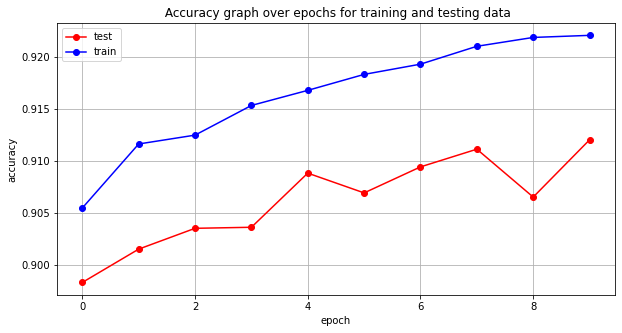

In [36]:
# Accuracy graph over epochs for training and testing data

Val_accuracy = records.history['val_accuracy']
Accuracy = records.history['accuracy']

x_len = np.arange(len(Accuracy))

plt.figure(figsize=(10, 5))
plt.plot(x_len, Val_accuracy, marker='o', color='r', label='test')
plt.plot(x_len, Accuracy, marker='o', color='b', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.title(" Accuracy graph over epochs for training and testing data")

Text(0.5, 1.0, 'Loss graph over epochs for training and testing data')

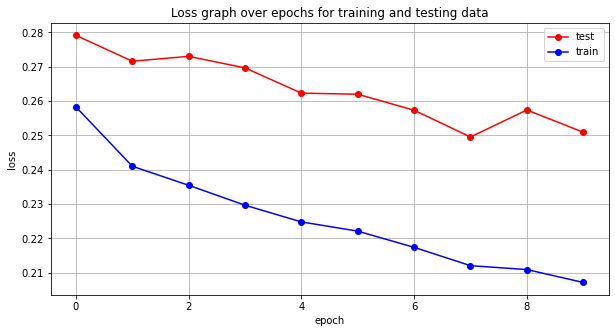

In [44]:
# Loss graph over epochs for training and testing data

Val_loss = records.history['val_loss']
loss = records.history['loss']

x_len = np.arange(len(loss))

plt.figure(figsize=(10, 5))
plt.plot(x_len, Val_loss, marker='o', color='r', label='test')
plt.plot(x_len, loss, marker='o', color='b', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.title("Loss graph over epochs for training and testing data")

In [50]:
# Optimizer change

#set-up : 1

optimizer_model_1= keras.models.Sequential([ 

          keras.layers.Conv2D(filters=32, kernel_size=5,  

                              strides=1, activation='relu',  

                              input_shape=(28,28,1), padding='same'), # layer 1

 

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

 

 

          keras.layers.Conv2D(filters=64, kernel_size=5,  

                              strides=1, activation='relu',padding='valid'), # layer 2

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

     

 

 

          keras.layers.Conv2D(filters=120, kernel_size=5,  

                              strides=1, activation='relu',padding='valid'),  #layer 3

     

                    

          keras.layers.Flatten(), 

          keras.layers.Dropout(0.2), 

          keras.layers.Dense(units=512, activation='relu'), # layer 4

          keras.layers.Dense(units=10, activation='softmax')]) #layer 5

optimizer_model_1.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Nadam(),metrics = ["accuracy"])
records_optimizer_1 = optimizer_model_1.fit(X_train,y_train,epochs = 5,batch_size = 512,validation_data =(X_test,y_test),callbacks = [callback])

Epoch 1/5
118/118 [==============================] - 40s 339ms/step - loss: 0.9246 - accuracy: 0.6458 - val_loss: 0.8428 - val_accuracy: 0.6805
Epoch 2/5
118/118 [==============================] - 48s 409ms/step - loss: 0.5514 - accuracy: 0.7909 - val_loss: 0.5675 - val_accuracy: 0.7880
Epoch 3/5
118/118 [==============================] - 46s 389ms/step - loss: 0.4661 - accuracy: 0.8273 - val_loss: 0.5062 - val_accuracy: 0.8091
Epoch 4/5
118/118 [==============================] - 48s 406ms/step - loss: 0.4173 - accuracy: 0.8460 - val_loss: 0.4095 - val_accuracy: 0.8525
Epoch 5/5
118/118 [==============================] - 52s 441ms/step - loss: 0.3800 - accuracy: 0.8595 - val_loss: 0.4146 - val_accuracy: 0.8464


Text(0.5, 1.0, ' Accuracy graph over epochs for training and testing data')

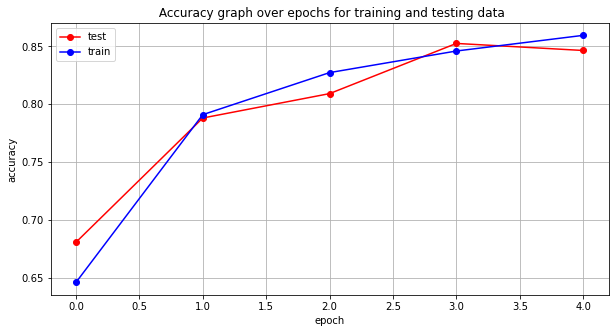

In [51]:
# Accuracy graph over epochs for training and testing data

Val_accuracy = records_optimizer_1.history['val_accuracy']
Accuracy = records_optimizer_1.history['accuracy']

x_len = np.arange(len(Accuracy))

plt.figure(figsize=(10, 5))
plt.plot(x_len, Val_accuracy, marker='o', color='r', label='test')
plt.plot(x_len, Accuracy, marker='o', color='b', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.title(" Accuracy graph over epochs for training and testing data")

In [52]:
# Set-up:2

optimizer_model_2= keras.models.Sequential([ 

          keras.layers.Conv2D(filters=32, kernel_size=5,  

                              strides=1, activation='relu',  

                              input_shape=(28,28,1), padding='same'), # layer 1

 

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

 

 

          keras.layers.Conv2D(filters=64, kernel_size=5,  

                              strides=1, activation='relu',padding='valid'), # layer 2

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

     

 

 

          keras.layers.Conv2D(filters=120, kernel_size=5,  

                              strides=1, activation='relu',padding='valid'),  #layer 3

     

                    

          keras.layers.Flatten(), 

          keras.layers.Dropout(0.2), 

          keras.layers.Dense(units=512, activation='relu'), # layer 4

          keras.layers.Dense(units=10, activation='softmax')]) #layer 5

optimizer_model_2.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.RMSprop(learning_rate = learning_rate_decay),metrics = ["accuracy"])
records_optimizer_2 = optimizer_model_2.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data =(X_test,y_test),callbacks = [callback])

Epoch 1/5
235/235 [==============================] - 52s 223ms/step - loss: 0.7518 - accuracy: 0.7108 - val_loss: 0.5531 - val_accuracy: 0.7891
Epoch 2/5
235/235 [==============================] - 52s 219ms/step - loss: 0.4445 - accuracy: 0.8363 - val_loss: 0.4358 - val_accuracy: 0.8333
Epoch 3/5
235/235 [==============================] - 53s 226ms/step - loss: 0.3605 - accuracy: 0.8669 - val_loss: 0.3651 - val_accuracy: 0.8651
Epoch 4/5
235/235 [==============================] - 50s 213ms/step - loss: 0.3139 - accuracy: 0.8834 - val_loss: 0.3726 - val_accuracy: 0.8570
Epoch 5/5
235/235 [==============================] - 51s 218ms/step - loss: 0.2852 - accuracy: 0.8951 - val_loss: 0.3265 - val_accuracy: 0.8767


Text(0.5, 1.0, ' Accuracy graph over epochs for training and testing data')

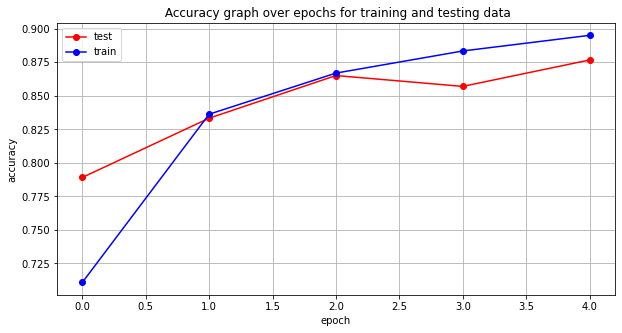

In [53]:
# Accuracy graph over epochs for training and testing data

Val_accuracy = records_optimizer_2.history['val_accuracy']
Accuracy = records_optimizer_2.history['accuracy']

x_len = np.arange(len(Accuracy))

plt.figure(figsize=(10, 5))
plt.plot(x_len, Val_accuracy, marker='o', color='r', label='test')
plt.plot(x_len, Accuracy, marker='o', color='b', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.title(" Accuracy graph over epochs for training and testing data")

In [59]:

# Set-up:3

optimizer_model_3= keras.models.Sequential([ 

          keras.layers.Conv2D(filters=32, kernel_size=5,  

                              strides=1, activation='relu',  

                              input_shape=(28,28,1), padding='same'), # layer 1

 

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

 

 

          keras.layers.Conv2D(filters=64, kernel_size=5,  

                              strides=1, activation='relu',padding='valid'), # layer 2

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

     

 

 

          keras.layers.Conv2D(filters=120, kernel_size=5,  

                              strides=1, activation='relu',padding='valid'),  #layer 3

     

                    

          keras.layers.Flatten(), 

          keras.layers.Dropout(0.2), 

          keras.layers.Dense(units=512, activation='relu'), # layer 4

          keras.layers.Dense(units=10, activation='softmax')]) #layer 5

optimizer_model_3.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(),metrics = ["accuracy"])
records_optimizer_3 = optimizer_model_3.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data =(X_test,y_test),callbacks = [callback])

Epoch 1/5
235/235 [==============================] - 50s 212ms/step - loss: 0.7144 - accuracy: 0.7321 - val_loss: 0.5023 - val_accuracy: 0.8081
Epoch 2/5
235/235 [==============================] - 53s 224ms/step - loss: 0.4512 - accuracy: 0.8340 - val_loss: 0.4096 - val_accuracy: 0.8496
Epoch 3/5
235/235 [==============================] - 46s 197ms/step - loss: 0.3851 - accuracy: 0.8589 - val_loss: 0.3597 - val_accuracy: 0.8669
Epoch 4/5
235/235 [==============================] - 44s 186ms/step - loss: 0.3491 - accuracy: 0.8720 - val_loss: 0.3429 - val_accuracy: 0.8721
Epoch 5/5
235/235 [==============================] - 47s 200ms/step - loss: 0.3254 - accuracy: 0.8802 - val_loss: 0.3299 - val_accuracy: 0.8787


Text(0.5, 1.0, ' Accuracy graph over epochs for training and testing data')

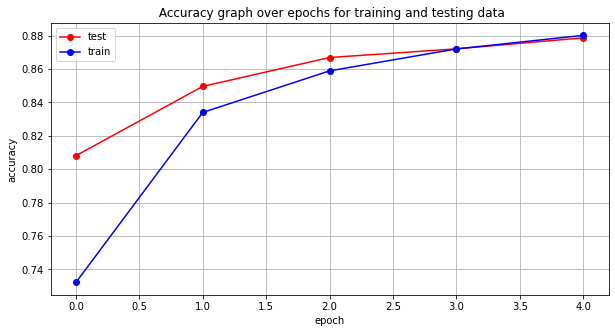

In [60]:
# Accuracy graph over epochs for training and testing data

Val_accuracy = records_optimizer_3.history['val_accuracy']
Accuracy = records_optimizer_3.history['accuracy']

x_len = np.arange(len(Accuracy))

plt.figure(figsize=(10, 5))
plt.plot(x_len, Val_accuracy, marker='o', color='r', label='test')
plt.plot(x_len, Accuracy, marker='o', color='b', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.title(" Accuracy graph over epochs for training and testing data")

In [61]:
# Activation function change

#set-up : 1

Activation_func_model_1= keras.models.Sequential([ 

          keras.layers.Conv2D(filters=32, kernel_size=5,  

                              strides=1, activation='tanh',  

                              input_shape=(28,28,1), padding='same'), # layer 1

 

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

 

 

          keras.layers.Conv2D(filters=64, kernel_size=5,  

                              strides=1, activation='tanh',padding='valid'), # layer 2

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

     

 

 

          keras.layers.Conv2D(filters=120, kernel_size=5,  

                              strides=1, activation='tanh',padding='valid'),  #layer 3

     

                    

          keras.layers.Flatten(), 

          keras.layers.Dropout(0.2), 

          keras.layers.Dense(units=512, activation='tanh'), # layer 4

          keras.layers.Dense(units=10, activation='softmax')]) #layer 5

Activation_func_model_1.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adamax(learning_rate = learning_rate_decay),metrics = ["accuracy"])
records_Activation_func_1 = Activation_func_model_1.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data =(X_test,y_test),callbacks = [callback])

Epoch 1/5
235/235 [==============================] - 50s 212ms/step - loss: 0.6869 - accuracy: 0.7451 - val_loss: 0.5439 - val_accuracy: 0.8005
Epoch 2/5
235/235 [==============================] - 57s 244ms/step - loss: 0.4916 - accuracy: 0.8218 - val_loss: 0.4768 - val_accuracy: 0.8281
Epoch 3/5
235/235 [==============================] - 63s 267ms/step - loss: 0.4469 - accuracy: 0.8365 - val_loss: 0.4465 - val_accuracy: 0.8393
Epoch 4/5
235/235 [==============================] - 64s 271ms/step - loss: 0.4131 - accuracy: 0.8497 - val_loss: 0.4117 - val_accuracy: 0.8551
Epoch 5/5
235/235 [==============================] - 59s 253ms/step - loss: 0.3911 - accuracy: 0.8575 - val_loss: 0.3958 - val_accuracy: 0.8597


Text(0.5, 1.0, ' Accuracy graph over epochs for training and testing data')

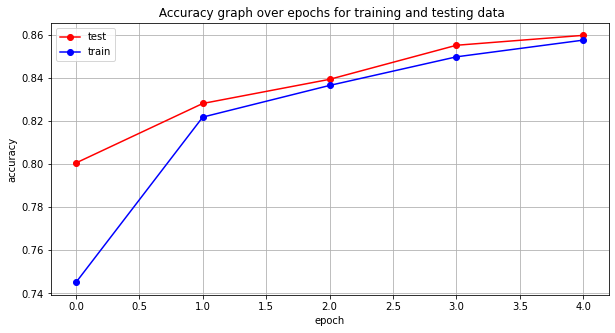

In [62]:
# Accuracy graph over epochs for training and testing data

Val_accuracy = records_Activation_func_1.history['val_accuracy']
Accuracy = records_Activation_func_1.history['accuracy']

x_len = np.arange(len(Accuracy))

plt.figure(figsize=(10, 5))
plt.plot(x_len, Val_accuracy, marker='o', color='r', label='test')
plt.plot(x_len, Accuracy, marker='o', color='b', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.title(" Accuracy graph over epochs for training and testing data")

In [64]:
# Activation function change

#set-up : 2

Activation_func_model_2= keras.models.Sequential([ 

          keras.layers.Conv2D(filters=32, kernel_size=5,  

                              strides=1, activation='selu',  

                              input_shape=(28,28,1), padding='same'), # layer 1

 

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

 

 

          keras.layers.Conv2D(filters=64, kernel_size=5,  

                              strides=1, activation='selu',padding='valid'), # layer 2

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

     

 

 

          keras.layers.Conv2D(filters=120, kernel_size=5,  

                              strides=1, activation='selu',padding='valid'),  #layer 3

     

                    

          keras.layers.Flatten(), 

          keras.layers.Dropout(0.2), 

          keras.layers.Dense(units=512, activation='selu'), # layer 4

          keras.layers.Dense(units=10, activation='softmax')]) #layer 5

Activation_func_model_2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adamax(learning_rate = learning_rate_decay),metrics = ["accuracy"])
records_Activation_func_2 = Activation_func_model_2.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data =(X_test,y_test),callbacks = [callback])

Epoch 1/5
235/235 [==============================] - 71s 301ms/step - loss: 0.6528 - accuracy: 0.7585 - val_loss: 0.5416 - val_accuracy: 0.8004
Epoch 2/5
235/235 [==============================] - 62s 262ms/step - loss: 0.4921 - accuracy: 0.8235 - val_loss: 0.4935 - val_accuracy: 0.8149
Epoch 3/5
235/235 [==============================] - 62s 265ms/step - loss: 0.4462 - accuracy: 0.8403 - val_loss: 0.4392 - val_accuracy: 0.8431
Epoch 4/5
235/235 [==============================] - 59s 251ms/step - loss: 0.4210 - accuracy: 0.8515 - val_loss: 0.4295 - val_accuracy: 0.8454
Epoch 5/5
235/235 [==============================] - 65s 277ms/step - loss: 0.4000 - accuracy: 0.8591 - val_loss: 0.4033 - val_accuracy: 0.8556


Text(0.5, 1.0, ' Accuracy graph over epochs for training and testing data')

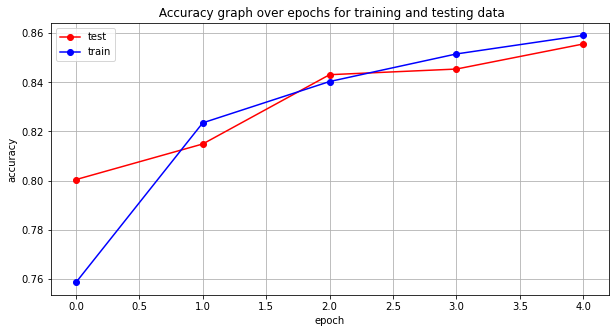

In [65]:
# Accuracy graph over epochs for training and testing data

Val_accuracy = records_Activation_func_2.history['val_accuracy']
Accuracy = records_Activation_func_2.history['accuracy']

x_len = np.arange(len(Accuracy))

plt.figure(figsize=(10, 5))
plt.plot(x_len, Val_accuracy, marker='o', color='r', label='test')
plt.plot(x_len, Accuracy, marker='o', color='b', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.title(" Accuracy graph over epochs for training and testing data")

In [66]:
# Activation function change

#set-up : 3

Activation_func_model_3= keras.models.Sequential([ 

          keras.layers.Conv2D(filters=32, kernel_size=5,  

                              strides=1, activation=tf.keras.layers.LeakyReLU(),  

                              input_shape=(28,28,1), padding='same'), # layer 1

 

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

 

 

          keras.layers.Conv2D(filters=64, kernel_size=5,  

                              strides=1, activation=tf.keras.layers.LeakyReLU(),padding='valid'), # layer 2

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

     

 

 

          keras.layers.Conv2D(filters=120, kernel_size=5,  

                              strides=1, activation=tf.keras.layers.LeakyReLU(),padding='valid'),  #layer 3

     

                    

          keras.layers.Flatten(), 

          keras.layers.Dropout(0.2), 

          keras.layers.Dense(units=512, activation=tf.keras.layers.LeakyReLU()), # layer 4

          keras.layers.Dense(units=10, activation='softmax')]) #layer 5

Activation_func_model_3.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adamax(learning_rate = learning_rate_decay),metrics = ["accuracy"])
records_Activation_func_3 = Activation_func_model_3.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data =(X_test,y_test),callbacks = [callback])

Epoch 1/5
235/235 [==============================] - 67s 284ms/step - loss: 0.7754 - accuracy: 0.7141 - val_loss: 0.5728 - val_accuracy: 0.7789
Epoch 2/5
235/235 [==============================] - 67s 284ms/step - loss: 0.5232 - accuracy: 0.8083 - val_loss: 0.4911 - val_accuracy: 0.8209
Epoch 3/5
235/235 [==============================] - 68s 290ms/step - loss: 0.4628 - accuracy: 0.8324 - val_loss: 0.4464 - val_accuracy: 0.8374
Epoch 4/5
235/235 [==============================] - 57s 242ms/step - loss: 0.4268 - accuracy: 0.8465 - val_loss: 0.4172 - val_accuracy: 0.8499
Epoch 5/5
235/235 [==============================] - 67s 284ms/step - loss: 0.4012 - accuracy: 0.8540 - val_loss: 0.4073 - val_accuracy: 0.8550


Text(0.5, 1.0, ' Accuracy graph over epochs for training and testing data')

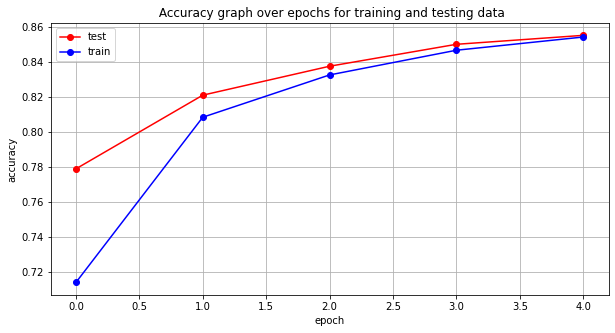

In [67]:
# Accuracy graph over epochs for training and testing data

Val_accuracy = records_Activation_func_3.history['val_accuracy']
Accuracy = records_Activation_func_3.history['accuracy']

x_len = np.arange(len(Accuracy))

plt.figure(figsize=(10, 5))
plt.plot(x_len, Val_accuracy, marker='o', color='r', label='test')
plt.plot(x_len, Accuracy, marker='o', color='b', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.title(" Accuracy graph over epochs for training and testing data")

In [69]:
# Kernel size change

#set-up : 1

Kernel_1= keras.models.Sequential([ 

          keras.layers.Conv2D(filters=32, kernel_size=2,  

                              strides=1, activation='relu',  

                              input_shape=(28,28,1), padding='same'), # layer 1

 

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

 

 

          keras.layers.Conv2D(filters=64, kernel_size=2,  

                              strides=1, activation='relu',padding='valid'), # layer 2

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

     

 

 

          keras.layers.Conv2D(filters=120, kernel_size=2,  

                              strides=1, activation='relu',padding='valid'),  #layer 3

     

                    

          keras.layers.Flatten(), 

          keras.layers.Dropout(0.2), 

          keras.layers.Dense(units=512, activation='relu'), # layer 4

          keras.layers.Dense(units=10, activation='softmax')]) #layer 5

Kernel_1.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adamax(learning_rate = learning_rate_decay),metrics = ["accuracy"])
records_kernel_1 = Kernel_1.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data =(X_test,y_test),callbacks = [callback])

Epoch 1/5
235/235 [==============================] - 48s 205ms/step - loss: 0.7018 - accuracy: 0.7479 - val_loss: 0.5310 - val_accuracy: 0.8064
Epoch 2/5
235/235 [==============================] - 45s 193ms/step - loss: 0.4690 - accuracy: 0.8292 - val_loss: 0.4489 - val_accuracy: 0.8377
Epoch 3/5
235/235 [==============================] - 45s 192ms/step - loss: 0.4102 - accuracy: 0.8523 - val_loss: 0.4171 - val_accuracy: 0.8480
Epoch 4/5
235/235 [==============================] - 47s 202ms/step - loss: 0.3798 - accuracy: 0.8636 - val_loss: 0.3700 - val_accuracy: 0.8703
Epoch 5/5
235/235 [==============================] - 43s 183ms/step - loss: 0.3535 - accuracy: 0.8728 - val_loss: 0.3520 - val_accuracy: 0.8735


Text(0.5, 1.0, ' Accuracy graph over epochs for training and testing data')

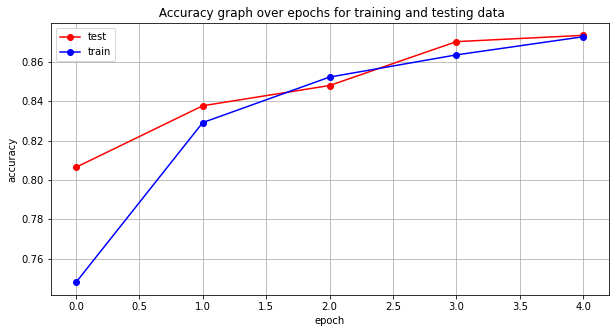

In [70]:
# Accuracy graph over epochs for training and testing data

Val_accuracy = records_kernel_1.history['val_accuracy']
Accuracy = records_kernel_1.history['accuracy']

x_len = np.arange(len(Accuracy))

plt.figure(figsize=(10, 5))
plt.plot(x_len, Val_accuracy, marker='o', color='r', label='test')
plt.plot(x_len, Accuracy, marker='o', color='b', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.title(" Accuracy graph over epochs for training and testing data")

In [72]:
# Kernel size change

#set-up : 2

Kernel_2= keras.models.Sequential([ 

          keras.layers.Conv2D(filters=32, kernel_size=3,  

                              strides=1, activation='relu',  

                              input_shape=(28,28,1), padding='same'), # layer 1

 

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

 

 

          keras.layers.Conv2D(filters=64, kernel_size=3,  

                              strides=1, activation='relu',padding='valid'), # layer 2

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

     

 

 

          keras.layers.Conv2D(filters=120, kernel_size=3,  

                              strides=1, activation='relu',padding='valid'),  #layer 3

     

                    

          keras.layers.Flatten(), 

          keras.layers.Dropout(0.2), 

          keras.layers.Dense(units=512, activation='relu'), # layer 4

          keras.layers.Dense(units=10, activation='softmax')]) #layer 5

Kernel_2.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adamax(learning_rate = learning_rate_decay),metrics = ["accuracy"])
records_kernel_2 = Kernel_2.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data =(X_test,y_test),callbacks = [callback])

Epoch 1/5
235/235 [==============================] - 51s 217ms/step - loss: 0.7149 - accuracy: 0.7378 - val_loss: 0.5339 - val_accuracy: 0.8067
Epoch 2/5
235/235 [==============================] - 57s 243ms/step - loss: 0.4736 - accuracy: 0.8286 - val_loss: 0.4500 - val_accuracy: 0.8373
Epoch 3/5
235/235 [==============================] - 52s 221ms/step - loss: 0.4120 - accuracy: 0.8507 - val_loss: 0.4055 - val_accuracy: 0.8551
Epoch 4/5
235/235 [==============================] - 47s 202ms/step - loss: 0.3788 - accuracy: 0.8625 - val_loss: 0.3745 - val_accuracy: 0.8683
Epoch 5/5
235/235 [==============================] - 52s 221ms/step - loss: 0.3511 - accuracy: 0.8730 - val_loss: 0.3496 - val_accuracy: 0.8769


Text(0.5, 1.0, ' Accuracy graph over epochs for training and testing data')

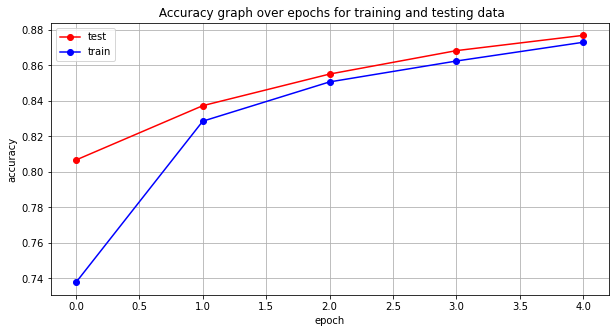

In [73]:
# Accuracy graph over epochs for training and testing data

Val_accuracy = records_kernel_2.history['val_accuracy']
Accuracy = records_kernel_2.history['accuracy']

x_len = np.arange(len(Accuracy))

plt.figure(figsize=(10, 5))
plt.plot(x_len, Val_accuracy, marker='o', color='r', label='test')
plt.plot(x_len, Accuracy, marker='o', color='b', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.title(" Accuracy graph over epochs for training and testing data")

In [74]:
# Kernel size change

#set-up : 3

Kernel_3= keras.models.Sequential([ 

          keras.layers.Conv2D(filters=32, kernel_size=4,  

                              strides=1, activation='relu',  

                              input_shape=(28,28,1), padding='same'), # layer 1

 

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

 

 

          keras.layers.Conv2D(filters=64, kernel_size=4,  

                              strides=1, activation='relu',padding='valid'), # layer 2

 

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'), 

     

 

 

          keras.layers.Conv2D(filters=120, kernel_size=4,  

                              strides=1, activation='relu',padding='valid'),  #layer 3

     

                    

          keras.layers.Flatten(), 

          keras.layers.Dropout(0.2), 

          keras.layers.Dense(units=512, activation='relu'), # layer 4

          keras.layers.Dense(units=10, activation='softmax')]) #layer 5

Kernel_3.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adamax(learning_rate = learning_rate_decay),metrics = ["accuracy"])
records_kernel_3 = Kernel_3.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data =(X_test,y_test),callbacks = [callback])

Epoch 1/5
235/235 [==============================] - 56s 240ms/step - loss: 0.7995 - accuracy: 0.7043 - val_loss: 0.5965 - val_accuracy: 0.7783
Epoch 2/5
235/235 [==============================] - 55s 232ms/step - loss: 0.5389 - accuracy: 0.8006 - val_loss: 0.5131 - val_accuracy: 0.8097
Epoch 3/5
235/235 [==============================] - 52s 221ms/step - loss: 0.4687 - accuracy: 0.8274 - val_loss: 0.4489 - val_accuracy: 0.8388
Epoch 4/5
235/235 [==============================] - 52s 222ms/step - loss: 0.4208 - accuracy: 0.8449 - val_loss: 0.4124 - val_accuracy: 0.8514
Epoch 5/5
235/235 [==============================] - 53s 226ms/step - loss: 0.3928 - accuracy: 0.8559 - val_loss: 0.3892 - val_accuracy: 0.8577


Text(0.5, 1.0, ' Accuracy graph over epochs for training and testing data')

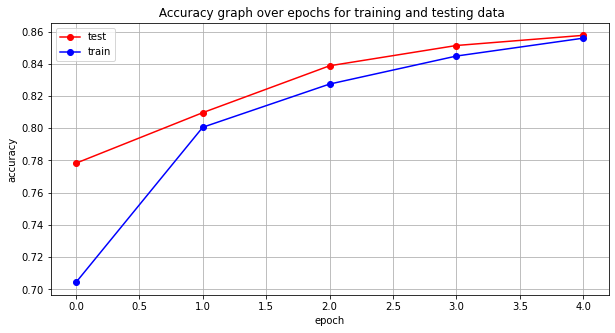

In [75]:
# Accuracy graph over epochs for training and testing data

Val_accuracy = records_kernel_3.history['val_accuracy']
Accuracy = records_kernel_3.history['accuracy']

x_len = np.arange(len(Accuracy))

plt.figure(figsize=(10, 5))
plt.plot(x_len, Val_accuracy, marker='o', color='r', label='test')
plt.plot(x_len, Accuracy, marker='o', color='b', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.title(" Accuracy graph over epochs for training and testing data")

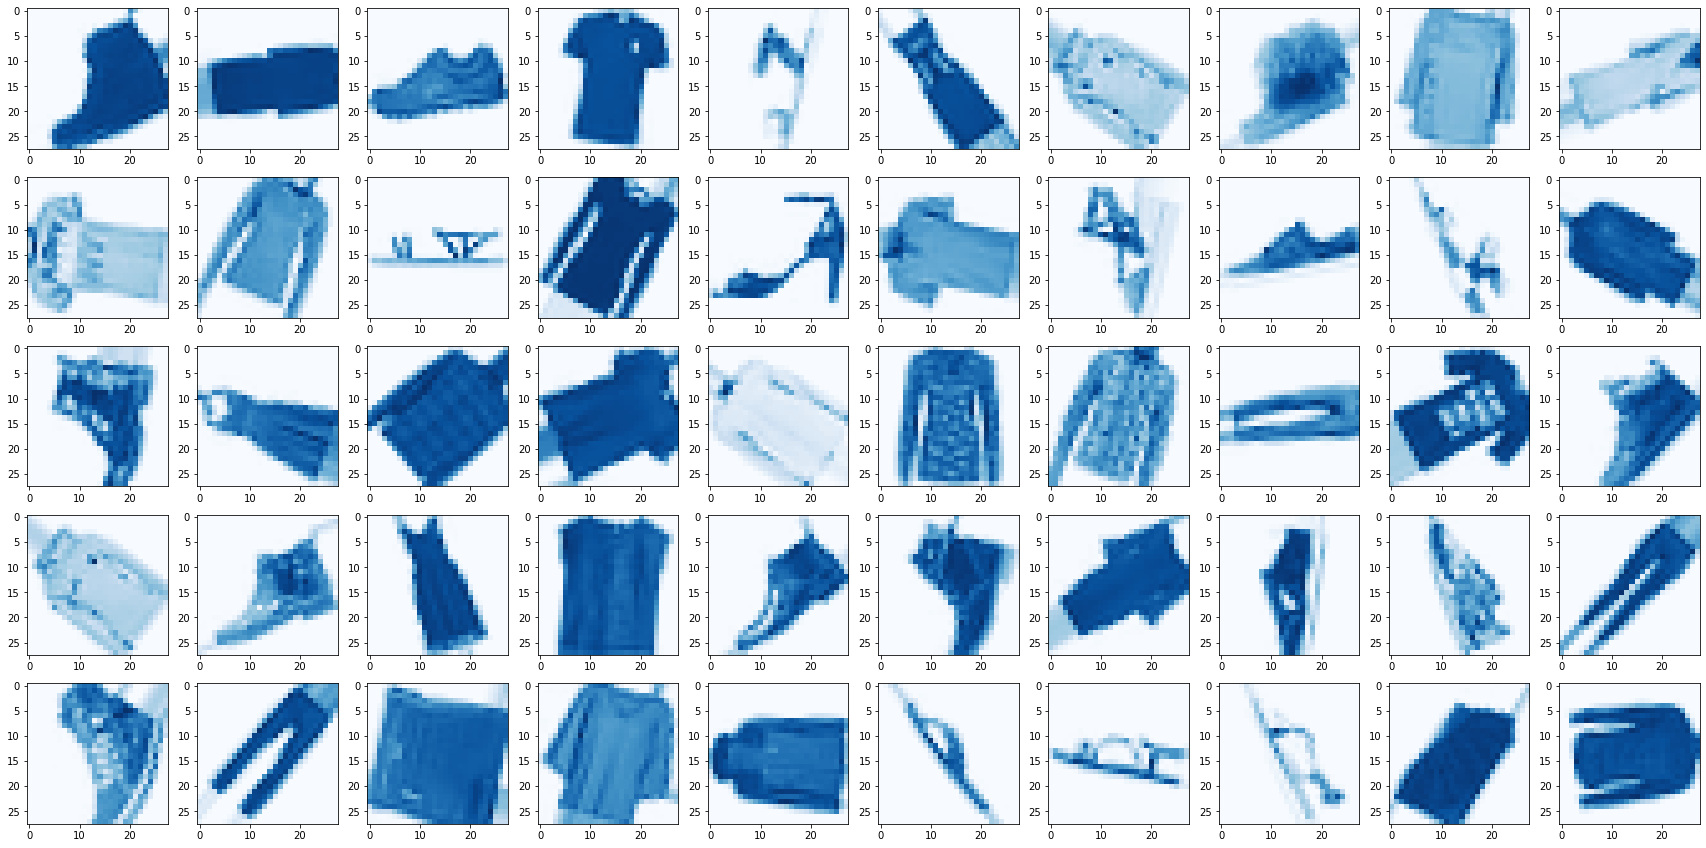

In [117]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rotation_range=90)

datagen.fit(X_train)

fig = plt.figure(figsize=[30, 15])
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=100):
# create a grid of 3x3 images
    for i in range(50):
        ax = fig.add_subplot(5, 10, i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap="Blues")
    # show the plot
    plt.show()
    break


In [113]:


aug_model = keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1.0 / 255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),


    tf.keras.layers.experimental.preprocessing.Resizing(50, 50),
    
          keras.layers.Conv2D(filters=32, kernel_size=5, 
                              strides=1, activation='relu', 
                              input_shape=(28,28,1), padding='same',kernel_initializer=tf.keras.initializers.LecunNormal(),), # layer-1

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'),

          keras.layers.Conv2D(filters=64, kernel_size=5, 
                              strides=1, activation='relu',padding='valid',kernel_initializer=tf.keras.initializers.LecunNormal(),), #layer-2


          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'),
    

          keras.layers.Conv2D(filters=120, kernel_size=5, 
                              strides=1, activation='relu',padding='valid',kernel_initializer=tf.keras.initializers.LecunNormal(),), #layer-3
    
                              
          keras.layers.Flatten(),

          keras.layers.Dropout(0.2),

          keras.layers.Dense(units=512, activation='relu'), #layer - 4
          keras.layers.Dense(units=10, activation='softmax')]) #layer-5

aug_model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adamax(),metrics = ["accuracy"])
records_aug = aug_model.fit(X_train,y_train,epochs = 5,batch_size = 512,validation_data =(X_test,y_test))

Epoch 1/5
118/118 [==============================] - 265s 2s/step - loss: 1.3547 - accuracy: 0.5216 - val_loss: 0.9951 - val_accuracy: 0.6427
Epoch 2/5
118/118 [==============================] - 236s 2s/step - loss: 0.8942 - accuracy: 0.6657 - val_loss: 0.8163 - val_accuracy: 0.6906
Epoch 3/5
118/118 [==============================] - 190s 2s/step - loss: 0.7598 - accuracy: 0.7105 - val_loss: 0.7346 - val_accuracy: 0.7254
Epoch 4/5
118/118 [==============================] - 178s 2s/step - loss: 0.6883 - accuracy: 0.7368 - val_loss: 0.6839 - val_accuracy: 0.7434
Epoch 5/5
118/118 [==============================] - 192s 2s/step - loss: 0.6408 - accuracy: 0.7580 - val_loss: 0.6355 - val_accuracy: 0.7664


Text(0.5, 1.0, ' Accuracy graph over epochs for training and testing data')

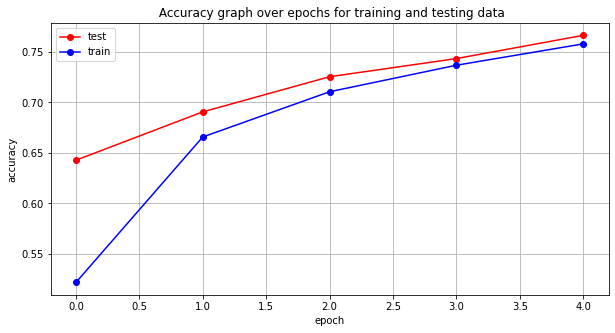

In [114]:
# Accuracy graph over epochs for training and testing data

Val_accuracy = records_aug.history['val_accuracy']
Accuracy = records_aug.history['accuracy']

x_len = np.arange(len(Accuracy))

plt.figure(figsize=(10, 5))
plt.plot(x_len, Val_accuracy, marker='o', color='r', label='test')
plt.plot(x_len, Accuracy, marker='o', color='b', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.title(" Accuracy graph over epochs for training and testing data")

### References:
https://pyimagesearch.com/2021/06/28/data-augmentation-with-tf-data-and-tensorflow/
https://pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/
https://www.youtube.com/watch?v=Y7Ld4H8sDUg&t=220s
https://www.kaggle.com/code/fuzzywizard/fashion-mnist-cnn-keras-accuracy-93
https://www.kaggle.com/code/arnavr10880/fashion-mnist-lenet-cnn-old-is-gold
https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image
https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip
https://faroit.com/keras-docs/2.0.8/optimizers/
https://datasciencechalktalk.wordpress.com/2019/07/10/deep-learning-for-image-recognition-convolutional-neural-network-with-tensorflow/